In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

KK


In [2]:
# Load the dataset
df = pd.read_csv('vgsales.csv') 

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# data imputing
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)

In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df.Name.unique().shape

(11493,)

In [11]:
df.Publisher.unique().shape

(578,)

In [12]:
df.Platform.unique().shape

(31,)

In [13]:
df.Genre.unique().shape

(12,)

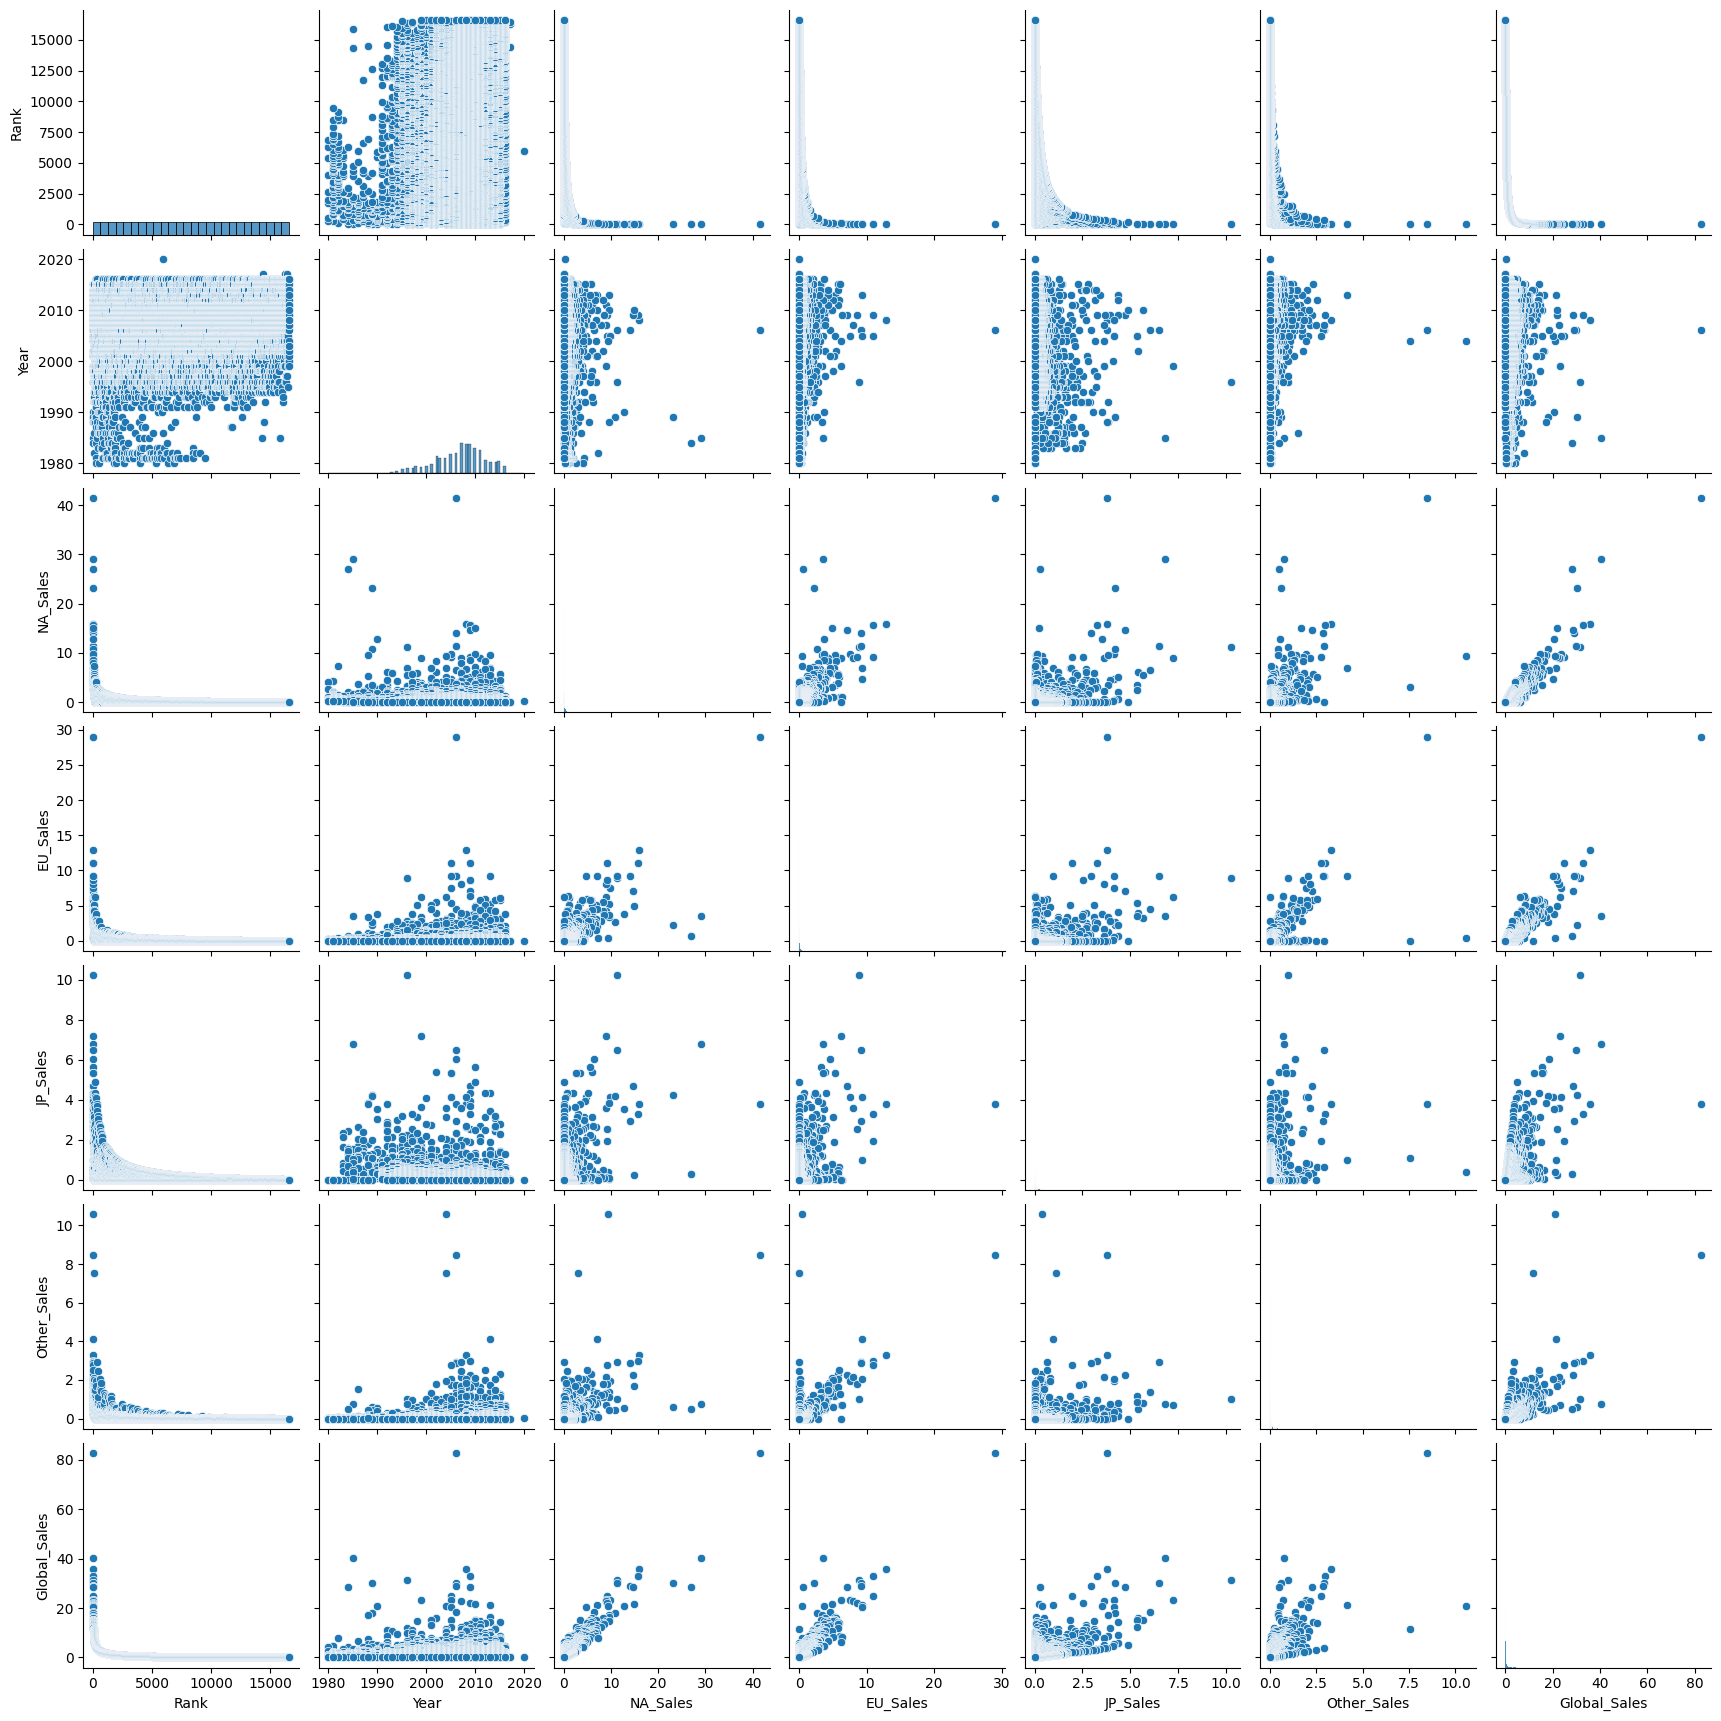

In [14]:
sns.pairplot(df)
plt.show()

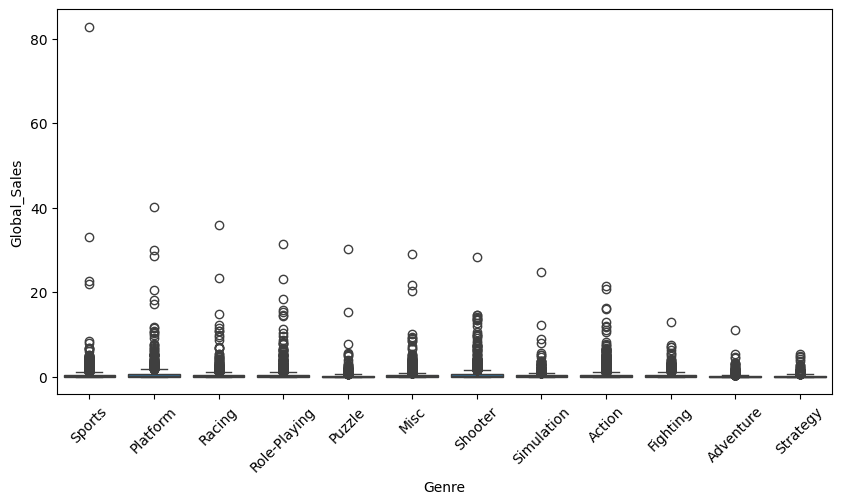

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Genre',y='Global_Sales', data=df)
plt.xticks(rotation = 45)
plt.show()

## Dummy Variable

In [16]:
# for genre
Genre = pd.get_dummies(df['Genre'],drop_first=True)

Genre = pd.DataFrame(Genre)
Genre = Genre * 1
Genre.head()

,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0


In [17]:
# for Platform
platform = pd.get_dummies(df['Platform'],drop_first=True)

platform = pd.DataFrame(platform)
platform = platform * 1
platform.head()

,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data = df.drop(columns=['Genre','Platform'])
# Print the first few rows to verify
data.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
VGS = pd.concat([data,Genre,platform],axis=1)
VGS.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Adventure,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1,Wii Sports,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,0,...,0,0,0,0,0,1,0,0,0,0
1,2,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Mario Kart Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Wii Sports Resort,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,0,...,0,0,0,0,0,0,0,0,0,0


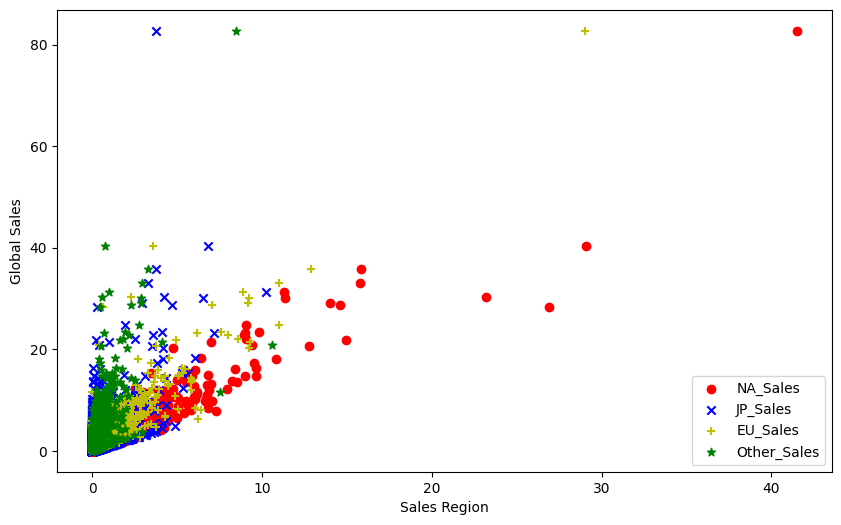

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.scatter(VGS['NA_Sales'], VGS['Global_Sales'], marker='o', c='r', label='NA_Sales')
axs.scatter(VGS['JP_Sales'], VGS['Global_Sales'], marker='x', c='b', label='JP_Sales')
axs.scatter(VGS['EU_Sales'], VGS['Global_Sales'], marker='+', c='y', label='EU_Sales')
axs.scatter(VGS['Other_Sales'], VGS['Global_Sales'], marker='*', c='g', label='Other_Sales')
axs.set_xlabel('Sales Region')
axs.set_ylabel('Global Sales')

axs.legend()

plt.show()

## Splitting into train and test

In [21]:
# Splitting into train and test
df_train, df_test = train_test_split(VGS, train_size=0.8, random_state=42)

In [22]:
df_train = df_train.drop(['Publisher','Name'],axis = 1)

In [23]:
# Rescaling the Features using Min-Max Scaling
scaler = MinMaxScaler()
num_vars = ['Year','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

## Step-3: Training the Model

In [24]:
df_train.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Adventure,Fighting,Misc,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Rank,1.000000,0.179297,-0.427370,-0.419583,-0.266335,-0.354524,-0.463237,0.194258,-0.032274,0.024968,...,0.024258,0.014716,-0.051894,0.010401,-0.000354,-0.024706,-0.016801,-0.097854,0.018609,-0.024763
Year,0.179297,1.000000,-0.108298,0.003449,-0.174540,0.043776,-0.089840,0.090580,-0.067742,0.050271,...,-0.190881,-0.041613,-0.270177,-0.024196,-0.020838,0.124196,0.116723,0.168661,-0.106638,0.161838
NA_Sales,-0.427370,-0.108298,1.000000,0.702595,0.462587,0.571867,0.929195,-0.071021,0.000602,-0.017160,...,-0.036405,-0.006728,0.001101,-0.004255,-0.006728,0.025072,0.005269,0.073089,-0.011518,0.016663
EU_Sales,-0.419583,0.003449,0.702595,1.000000,0.436376,0.690300,0.872779,-0.060915,-0.014661,-0.020639,...,-0.033700,-0.006263,-0.016812,-0.003961,-0.006263,0.014067,0.010236,0.045617,-0.035379,0.016023
JP_Sales,-0.266335,-0.174540,0.462587,0.436376,1.000000,0.263536,0.637676,-0.037314,0.021417,-0.018754,...,0.036778,-0.000351,0.170181,0.000096,0.009457,-0.030601,0.007865,-0.063276,-0.055655,-0.027663
Other_Sales,-0.354524,0.043776,0.571867,0.690300,0.263536,1.000000,0.705279,-0.057900,-0.005948,-0.010256,...,-0.028833,-0.005291,-0.023551,-0.003346,-0.005291,0.004471,0.002271,0.029166,-0.048015,0.004314
Global_Sales,-0.463237,-0.089840,0.929195,0.872779,0.637676,0.705279,1.000000,-0.072611,-0.000359,-0.021050,...,-0.025615,-0.006285,0.029761,-0.003922,-0.004156,0.011731,0.008052,0.043214,-0.035428,0.008378
Adventure,0.194258,0.090580,-0.071021,-0.060915,-0.037314,-0.057900,-0.072611,1.000000,-0.067284,-0.099705,...,0.020046,-0.005617,-0.028947,0.019431,-0.005617,-0.011775,-0.018074,-0.040283,-0.041031,-0.009547
Fighting,-0.032274,-0.067742,0.000602,-0.014661,0.021417,-0.005948,-0.000359,-0.067284,1.000000,-0.080110,...,0.056263,-0.004513,0.027099,-0.002854,-0.004513,-0.024466,-0.010821,-0.004703,0.010277,-0.010671
Misc,0.024968,0.050271,-0.017160,-0.020639,-0.018754,-0.010256,-0.021050,-0.099705,-0.080110,1.000000,...,-0.004205,0.018520,-0.016681,-0.004229,-0.006687,0.095512,0.007070,-0.003564,-0.031995,-0.009953


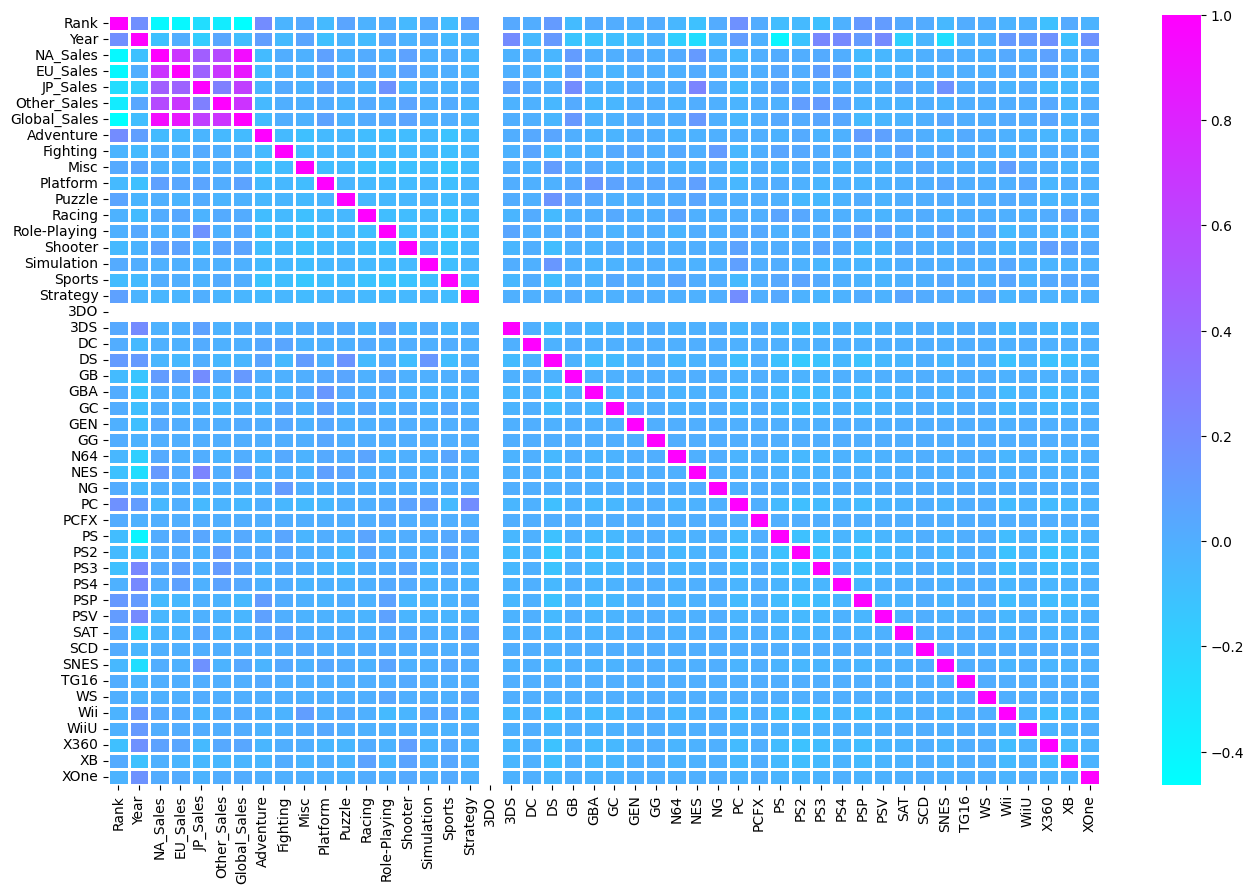

In [25]:
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(),cmap = 'cool',linewidths=1)
plt.show()

In [26]:
# Training the initial model with two feature
X_train_sm = sm.add_constant(df_train[['Year','NA_Sales']])
lr = sm.OLS(df_train['Global_Sales'], X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.200e+04
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                 38931.
No. Observations:               13278   AIC:                        -7.786e+04
Df Residuals:                   13275   BIC:                        -7.783e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.190      0.8

In [27]:
# Training the initial model with two feature
X_train_sm = sm.add_constant(df_train[['NA_Sales','EU_Sales']])
lr = sm.OLS(df_train['Global_Sales'], X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.550e+05
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                 46904.
No. Observations:               13278   AIC:                        -9.380e+04
Df Residuals:                   13275   BIC:                        -9.378e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005   6.53e-05      6.907      0.0

In [28]:
# Training the initial model with three feature
X_train_sm = sm.add_constant(df_train[['NA_Sales','EU_Sales','JP_Sales']])
lr = sm.OLS(df_train['Global_Sales'], X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.720e+05
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                 58039.
No. Observations:               13278   AIC:                        -1.161e+05
Df Residuals:                   13274   BIC:                        -1.160e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.635e-05   2.83e-05     -3.048      0.0

In [29]:
# Training the model with all variables
X_train_sm = sm.add_constant(df_train.drop(columns=['Global_Sales']))
lr = sm.OLS(df_train['Global_Sales'], X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.102e+07
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:             1.0006e+05
No. Observations:               13278   AIC:                        -2.000e+05
Df Residuals:                   13231   BIC:                        -1.997e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002   1.32e-05    -17.779   

### RFE - Recursive Feature Elimination 

In [30]:
# Feature Selection using Recursive Feature Elimination (RFE)
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(df_train.drop(columns=['Global_Sales']), df_train['Global_Sales'])
list(zip(df_train.drop(columns=['Global_Sales']).columns, rfe.support_, rfe.ranking_))

[('Rank', False, 37),
 ('Year', True, 1),
 ('NA_Sales', True, 1),
 ('EU_Sales', True, 1),
 ('JP_Sales', True, 1),
 ('Other_Sales', True, 1),
 ('Adventure', False, 32),
 ('Fighting', False, 30),
 ('Misc', False, 24),
 ('Platform', False, 22),
 ('Puzzle', False, 14),
 ('Racing', False, 33),
 ('Role-Playing', False, 20),
 ('Shooter', False, 23),
 ('Simulation', False, 31),
 ('Sports', False, 29),
 ('Strategy', False, 34),
 ('3DO', False, 38),
 ('3DS', False, 18),
 ('DC', False, 9),
 ('DS', False, 36),
 ('GB', False, 7),
 ('GBA', False, 27),
 ('GC', False, 25),
 ('GEN', False, 16),
 ('GG', True, 1),
 ('N64', False, 28),
 ('NES', False, 4),
 ('NG', True, 1),
 ('PC', False, 19),
 ('PCFX', False, 3),
 ('PS', True, 1),
 ('PS2', False, 10),
 ('PS3', False, 15),
 ('PS4', False, 12),
 ('PSP', False, 13),
 ('PSV', False, 8),
 ('SAT', False, 5),
 ('SCD', True, 1),
 ('SNES', False, 2),
 ('TG16', True, 1),
 ('WS', False, 6),
 ('Wii', False, 35),
 ('WiiU', False, 17),
 ('X360', False, 21),
 ('XB', Fal

In [31]:
# Selecting columns based on RFE
selected_cols = df_train.drop(columns=['Global_Sales']).columns[rfe.support_]
X_train_rfe = df_train[selected_cols]
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
# Training the final model with selected features
lm_final = sm.OLS(df_train['Global_Sales'], X_train_rfe).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.614e+07
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:             1.0001e+05
No. Observations:               13278   AIC:                        -2.000e+05
Df Residuals:                   13267   BIC:                        -1.999e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0002   6.12e-06    -37.267      

## Step-4 : Residual Analysis

In [33]:
# Predicting the price on the training set
y_train_price = lm_final.predict(X_train_rfe)

In [34]:
# Residual analysis
residuals = df_train['Global_Sales'] - y_train_price

In [35]:
residuals

14303   -0.000011
13455   -0.000010
6724    -0.000008
898     -0.000007
8484    -0.000009
           ...   
11284   -0.000258
11964   -0.000010
5390    -0.000008
860     -0.000005
15795    0.000238
Length: 13278, dtype: float64

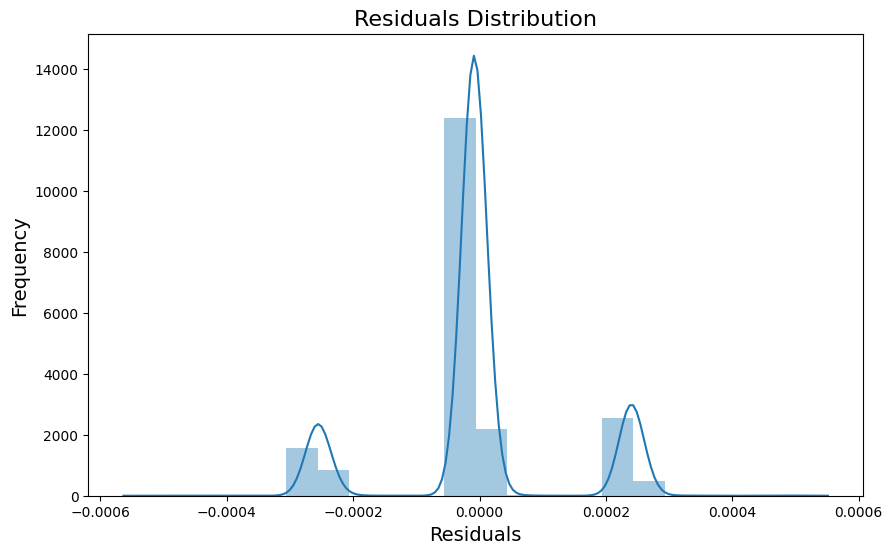

In [36]:
# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.distplot(residuals, bins=20)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Step5 : Predictions and Evaluation on the Test Set

In [37]:
# Transforming the test set with the same scaler used for training set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [38]:
# Selecting the same columns in the test set as in the training set
X_test_rfe = df_test[selected_cols]
X_test_rfe = sm.add_constant(X_test_rfe)

In [39]:
# Making predictions on the test set
y_pred_test = lm_final.predict(X_test_rfe)

In [40]:
# Calculate R-squared on test set
r2_test = r2_score(df_test['Global_Sales'], y_pred_test)
print("R-squared on test set:", r2_test)

R-squared on test set: 0.9999934718213349


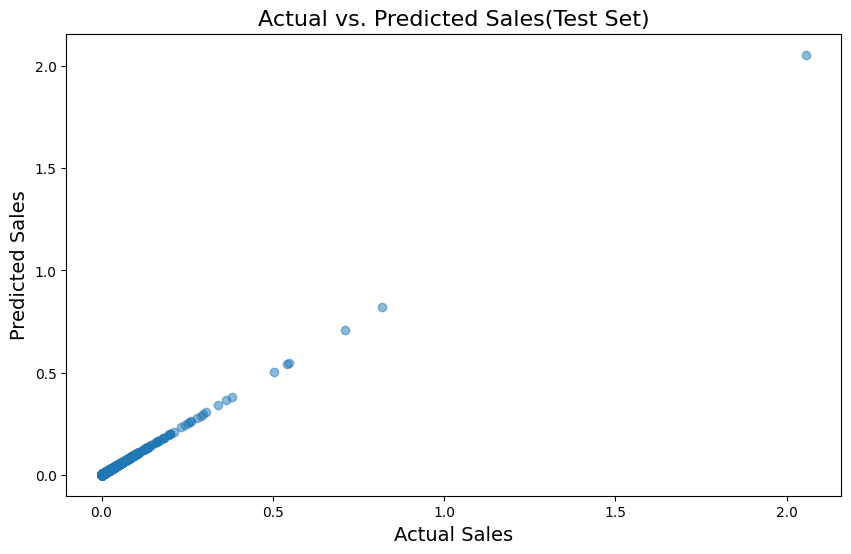

In [41]:
# Visualizing actual vs. predicted prices on the test set
plt.figure(figsize=(10, 6))
plt.scatter(df_test['Global_Sales'], y_pred_test, alpha=0.5)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs. Predicted Sales(Test Set)', fontsize=16)
plt.show()

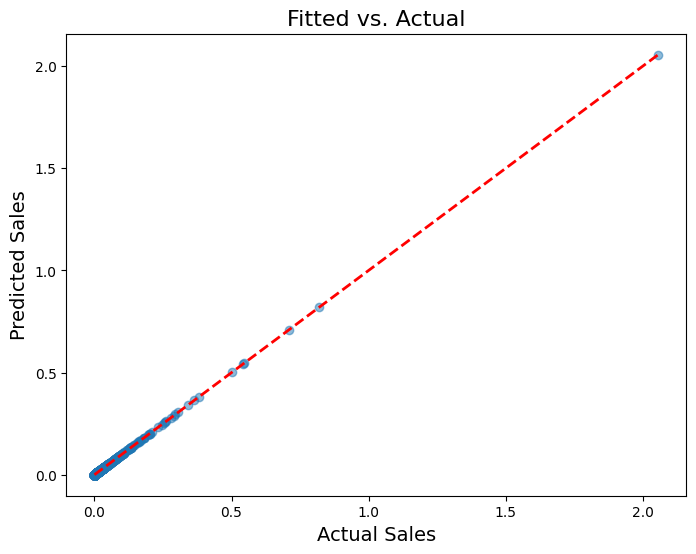

In [42]:
# Fitted vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_test['Global_Sales'], y_pred_test, alpha=0.5)
plt.plot([df_test['Global_Sales'].min(), df_test['Global_Sales'].max()], [df_test['Global_Sales'].min(), df_test['Global_Sales'].max()], 'r--', lw=2)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Fitted vs. Actual', fontsize=16)
plt.show()

In [43]:
# Create a DataFrame with actual prices, predicted prices, and variables used for prediction
predictions_df = pd.DataFrame({
    'Actual_Sales': df_test['Global_Sales'],
    'Predicted_Sales': y_pred_test
})

In [44]:
# Add the variables used for prediction to the DataFrame
for column in X_test_rfe.columns:
    predictions_df[column] = X_test_rfe[column]

In [45]:
# Save the DataFrame as a CSV file
predictions_df.to_csv('vg_sales_predictions.csv', index=False)

In [46]:
predictions_df.head()

,Actual_Sales,Predicted_Sales,const,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,GG,NG,PS,SCD,TG16
8928,0.003480,0.003488,1.0,0.800,0.000344,0.008540,0.000000,0.002838,0,0,0,0,0
4789,0.009694,0.009952,1.0,0.675,0.011004,0.003106,0.000978,0.003784,0,0,0,0,0
15492,0.000249,0.000261,1.0,0.575,0.000000,0.001553,0.000000,0.000000,0,0,0,0,0
14767,0.000497,0.000259,1.0,0.675,0.000344,0.000776,0.000000,0.000000,0,0,0,0,0
5211,0.008700,0.008708,1.0,0.725,0.006878,0.008540,0.000000,0.004730,0,0,0,0,0


In [47]:
# Calculate the price difference
predictions_df['Sales_Difference'] = predictions_df['Actual_Sales'] - predictions_df['Predicted_Sales']

# Print the first few rows of the DataFrame with the price difference
print(predictions_df[['Actual_Sales', 'Predicted_Sales', 'Sales_Difference']].head())

       Actual_Sales  Predicted_Sales  Sales_Difference
8928       0.003480         0.003488         -0.000008
4789       0.009694         0.009952         -0.000257
15492      0.000249         0.000261         -0.000012
14767      0.000497         0.000259          0.000238
5211       0.008700         0.008708         -0.000008


In [48]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lm, X_train_rfe, y_train_price, cv=5, scoring='r2')

In [49]:
print("R-squared scores:", cv_scores)
print("Average R-squared:", cv_scores.mean())

R-squared scores: [1. 1. 1. 1. 1.]
Average R-squared: 0.9999999999833541
